# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Dependencies 
import json
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from config import api_key
from citipy import citipy


url = "http://api.openweathermap.org/data/2.5/weather?q="

longitude = (-180, 180) #upon doing some research, had a quick lesson on longitude and latitude
latitude = (-90, 90)


## Generate Cities List

In [2]:
coordinantes = []
cityname = []

long = np.random.uniform(size = 2000, low = -180.00, high = 180.00)
lati = np.random.uniform(size = 2000, low = -09.00, high = 90.00)
coordinates = zip(lati, long) #join the 2 tuples together to form the coordinance

       
for coord in coordinates:
        city = citipy.nearest_city(coord[0], coord[1]).city_name 
        # using imported citipy's function with randomly generated coordinates to get city names 

        if city not in cityname: #some cities would be repeated in an area, if statement in place to avoid redundancies
            cityname.append(city) 
            #print(city) to have a look at te city list.

print (f' There are a total of {len(cityname)} cities from the sample')

 There are a total of 898 cities from the sample


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#creating several blank lists to hold data
temperature =[]
humidity = []
cloudiness = []
wind_speed = []
queried_city = [] # to verify when the city data is in openweathermap
cityid= []
country = []
longi = [] #another longitude list to get exact longitude from openweathermap
latit = [] #similarly to the purpose of longi
date = [] #to get weather data on the same date
limiter = 0
process_group = 1
i = 0
units = "imperial" #set to imperial as faherenheit and mph required
query_url = f"&appid={api_key}&units={units}"


# To look at the structure of the data
# cities = 'kuala lumpur'
# weather_response = weather_response = requests.get(url+cities.replace(" ", "+")+query_url).json()
# weather_response

for cities in cityname:
    try:
        weather_response = requests.get(url+cities.replace(" ", "+")+query_url).json() #replacing space with + 
        temperature.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        cityid.append(weather_response['id'])
        longi.append(weather_response['coord']['lon'])
        latit.append(weather_response['coord']['lat'])
        date.append(weather_response['dt'])
        if limiter > 50: #as free API key, only has limit of 60 calls per minute
            limiter = 1
            process_group += 1
            queried_city.append(cities)
        else:
            limiter +=1
            queried_city.append(cities)
        print(f"Processed {limiter} in group {process_group} for City ID: {cityid[i]} | {cities}")
        i += 1
    except :
        print(f'{cities} not found in Openweathermap.org')
        
print(f'--API Retrieval Completed--')

Processed 1 in group 1 for City ID: 5855051 | ewa beach
Processed 2 in group 1 for City ID: 5848280 | kapaa
Processed 3 in group 1 for City ID: 3628473 | san cristobal
Processed 4 in group 1 for City ID: 3372472 | vila franca do campo
Processed 5 in group 1 for City ID: 5942913 | dryden
Processed 6 in group 1 for City ID: 4020109 | atuona
Processed 7 in group 1 for City ID: 4164092 | merritt island
Processed 8 in group 1 for City ID: 2338660 | yaan
Processed 9 in group 1 for City ID: 1735106 | georgetown
Processed 10 in group 1 for City ID: 3374083 | bathsheba
Processed 11 in group 1 for City ID: 5924351 | clyde river
Processed 12 in group 1 for City ID: 1853371 | ryotsu
Processed 13 in group 1 for City ID: 1280037 | shache
Processed 14 in group 1 for City ID: 3423146 | ilulissat
Processed 15 in group 1 for City ID: 64814 | bandarbeyla
Processed 16 in group 1 for City ID: 3394023 | natal
Processed 17 in group 1 for City ID: 5855927 | hilo
Processed 18 in group 1 for City ID: 1328421 | 

Processed 37 in group 3 for City ID: 178093 | witu
Processed 38 in group 3 for City ID: 3386213 | touros
Processed 39 in group 3 for City ID: 777019 | vardo
Processed 40 in group 3 for City ID: 1268510 | kalagarh
Processed 41 in group 3 for City ID: 5991056 | kenora
saleaula not found in Openweathermap.org
Processed 42 in group 3 for City ID: 2264557 | ponta do sol
Processed 43 in group 3 for City ID: 546105 | nikolskoye
Processed 44 in group 3 for City ID: 1735106 | george town
Processed 45 in group 3 for City ID: 3450083 | santa maria
Processed 46 in group 3 for City ID: 2119283 | zyryanka
sentyabrskiy not found in Openweathermap.org
attawapiskat not found in Openweathermap.org
Processed 47 in group 3 for City ID: 528242 | mayskiy
Processed 48 in group 3 for City ID: 5847411 | kahului
Processed 49 in group 3 for City ID: 2026023 | bukachacha
Processed 50 in group 3 for City ID: 1497220 | novichikha
Processed 51 in group 3 for City ID: 1510689 | baykit
Processed 1 in group 4 for City 

Processed 20 in group 6 for City ID: 2122605 | okhotsk
Processed 21 in group 6 for City ID: 4802316 | clarksburg
Processed 22 in group 6 for City ID: 505820 | povenets
Processed 23 in group 6 for City ID: 3416888 | grindavik
Processed 24 in group 6 for City ID: 5767918 | pierre
Processed 25 in group 6 for City ID: 5044290 | saint anthony
Processed 26 in group 6 for City ID: 1177446 | gwadar
Processed 27 in group 6 for City ID: 359792 | aswan
Processed 28 in group 6 for City ID: 4362001 | mayo
Processed 29 in group 6 for City ID: 4466033 | fayetteville
Processed 30 in group 6 for City ID: 2450173 | taoudenni
Processed 31 in group 6 for City ID: 2094342 | kavieng
Processed 32 in group 6 for City ID: 3491355 | black river
Processed 33 in group 6 for City ID: 4328010 | houma
Processed 34 in group 6 for City ID: 3146487 | raudeberg
Processed 35 in group 6 for City ID: 2315417 | inongo
Processed 36 in group 6 for City ID: 863061 | usinsk
Processed 37 in group 6 for City ID: 498421 | satis
Pr

Processed 9 in group 9 for City ID: 2396853 | omboue
Processed 10 in group 9 for City ID: 2399001 | mayumba
Processed 11 in group 9 for City ID: 5563839 | fortuna
Processed 12 in group 9 for City ID: 2622793 | ebeltoft
Processed 13 in group 9 for City ID: 7071576 | wuning
Processed 14 in group 9 for City ID: 1791673 | weihai
Processed 15 in group 9 for City ID: 1529102 | urumqi
Processed 16 in group 9 for City ID: 2171465 | clarence town
Processed 17 in group 9 for City ID: 5059430 | grand forks
Processed 18 in group 9 for City ID: 3639898 | guatire
Processed 19 in group 9 for City ID: 564593 | dubovskoye
Processed 20 in group 9 for City ID: 8010683 | porto santo
Processed 21 in group 9 for City ID: 2121052 | sovetskaya gavan
Processed 22 in group 9 for City ID: 1785572 | yuxia
Processed 23 in group 9 for City ID: 5509851 | pahrump
cheuskiny not found in Openweathermap.org
kamenskoye not found in Openweathermap.org
Processed 24 in group 9 for City ID: 1802618 | longhua
Processed 25 in 

Processed 45 in group 11 for City ID: 4034551 | faanui
Processed 46 in group 11 for City ID: 3383384 | onverwacht
Processed 47 in group 11 for City ID: 4792522 | waynesboro
Processed 48 in group 11 for City ID: 491281 | sokol
Processed 49 in group 11 for City ID: 296852 | erzin
Processed 50 in group 11 for City ID: 2029156 | suhbaatar
Processed 51 in group 11 for City ID: 57000 | hobyo
Processed 1 in group 12 for City ID: 158684 | kabanga
Processed 2 in group 12 for City ID: 1854774 | oda
Processed 3 in group 12 for City ID: 5870133 | nome
Processed 4 in group 12 for City ID: 4468261 | goldsboro
Processed 5 in group 12 for City ID: 3198126 | kladanj
Processed 6 in group 12 for City ID: 4447161 | starkville
dekoa not found in Openweathermap.org
Processed 7 in group 12 for City ID: 3697441 | el alto
Processed 8 in group 12 for City ID: 264878 | ano mera
Processed 9 in group 12 for City ID: 1255264 | tadepallegudem
Processed 10 in group 12 for City ID: 1529376 | korla
Processed 11 in grou

Processed 29 in group 14 for City ID: 8079926 | labuhan
Processed 30 in group 14 for City ID: 464891 | zapadnaya dvina
Processed 31 in group 14 for City ID: 2034615 | tahe
Processed 32 in group 14 for City ID: 2028028 | aksha
Processed 33 in group 14 for City ID: 2038087 | chengde
Processed 34 in group 14 for City ID: 1803936 | wuwei
Processed 35 in group 14 for City ID: 3176959 | florence
Processed 36 in group 14 for City ID: 2025456 | chernyshevskiy
Processed 37 in group 14 for City ID: 262418 | filiatra
Processed 38 in group 14 for City ID: 1489853 | tazovskiy
Processed 39 in group 14 for City ID: 1082243 | ambilobe
Processed 40 in group 14 for City ID: 5983607 | inuvik
Processed 41 in group 14 for City ID: 4219934 | roswell
Processed 42 in group 14 for City ID: 2826909 | stockach
Processed 43 in group 14 for City ID: 3421193 | paamiut
Processed 44 in group 14 for City ID: 2445704 | diffa
Processed 45 in group 14 for City ID: 1337607 | kudahuvadhoo
Processed 46 in group 14 for City 

Processed 11 in group 17 for City ID: 217389 | demba
Processed 12 in group 17 for City ID: 2512186 | puerto del rosario
--API Retrieval Completed--


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
compiled_data = {'City Name': queried_city, 'Country': country, 'Date': date, 'Latitude': latit, 'Longitude': longi,
                'Temperature(F)': temperature, 'Humidity(%)': humidity, 'Cloudiness(%)':cloudiness, 'Wind Speed(mph)': wind_speed}
weather_data = pd.DataFrame(compiled_data)

# Output File (CSV)
weather_data.to_csv('Output\weather_data.csv',index = False, header=True)
                                    

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
over_humid = (weather_data['Humidity(%)'] > 100).value_counts()
over_humid
#There are no cities with over 100% humidity

False    828
Name: Humidity(%), dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

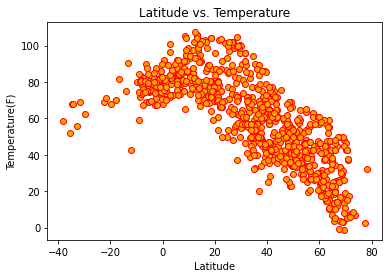

In [6]:
plt.scatter(weather_data['Latitude'], weather_data['Temperature(F)'], color='orange', edgecolors="red")
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.savefig("output/lat_vs_temp.png")


## Latitude vs. Humidity Plot

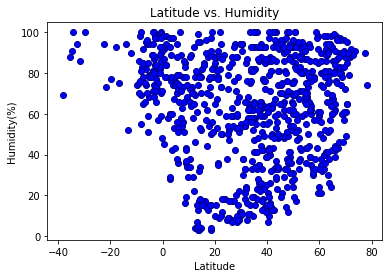

In [7]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity(%)'], color='blue', edgecolors="darkblue")
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.savefig("output/lat_vs_hum.png")

## Latitude vs. Cloudiness Plot

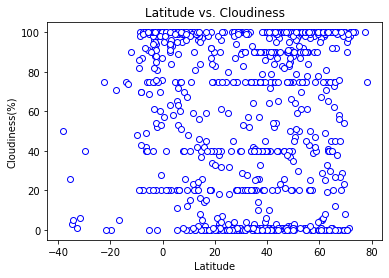

In [8]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness(%)'], color='white', edgecolors="blue")
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("output/lat_vs_cloud.png")

## Latitude vs. Wind Speed Plot

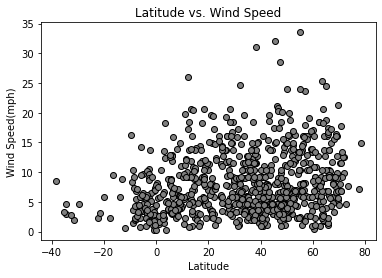

In [9]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed(mph)'], color='gray', edgecolors="black")
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig("output/lat_vs_wind.png")

## Linear Regression

In [21]:
northhems = weather_data[weather_data['Latitude'] >= 0]
northhems.reset_index(drop=True)

southhems = weather_data[weather_data['Latitude'] < 0]
southhems.reset_index(drop=True)

print(f'Total Cities: {len(weather_data)}\nTotal Cities in the Northern Hemisphere: {len(northhems)} \nTotal Cities in the Southern Hemisphere:{len(southhems)}')

Total Cities: 828
Total Cities in the Northern Hemisphere: 734 
Total Cities in the Southern Hemisphere:94


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.82


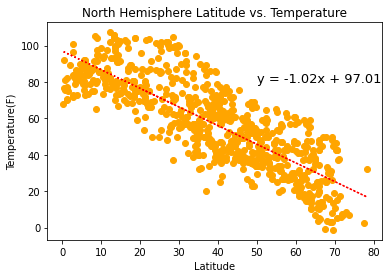

In [22]:
#North Hemisphere Max Temp vs. Latitude Linear Regression as nhtvllr

nhtvllr_correlation = sts.pearsonr(northhems['Latitude'],northhems['Temperature(F)'])
print(f'The correlation between both factors is {round(nhtvllr_correlation[0],2)}')

nhtvllr_slope, nhtvllr_int, nhtvllr_r, nhtvllr_p, nhtvllr_std_err = sts.linregress(northhems['Latitude'],northhems['Temperature(F)'])
nhtvllr_fit = nhtvllr_slope * northhems['Latitude'] + nhtvllr_int

plt.scatter(northhems['Latitude'],northhems['Temperature(F)'], color='orange', )
plt.title('North Hemisphere Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')

line_equation = f'y = {str(round(nhtvllr_slope,2))}x + {str(round(nhtvllr_int,2))}'
plt.annotate(line_equation,(50,80),fontsize=13,color='black')
plt.plot(northhems['Latitude'],nhtvllr_fit,':r')
plt.savefig("output/northlat_vs_temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.55


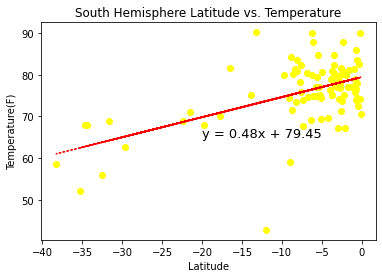

In [23]:
#South Hemisphere Max Temp vs. Latitude Linear Regression as shtvllr

shtvllr_correlation = sts.pearsonr(southhems['Latitude'],southhems['Temperature(F)'])
print(f'The correlation between both factors is {round(shtvllr_correlation[0],2)}')

shtvllr_slope, shtvllr_int, shtvllr_r, shtvllr_p, shtvllr_std_err = sts.linregress(southhems['Latitude'],southhems['Temperature(F)'])
shtvllr_fit = shtvllr_slope * southhems['Latitude'] + shtvllr_int

plt.scatter(southhems['Latitude'],southhems['Temperature(F)'], color='yellow', )
plt.title('South Hemisphere Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')

line_equation = f'y = {str(round(shtvllr_slope,2))}x + {str(round(shtvllr_int,2))}'
plt.annotate(line_equation,(-20,65),fontsize=13,color='black')
plt.plot(southhems['Latitude'],shtvllr_fit,':r')
plt.savefig("output/southlat_vs_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.14


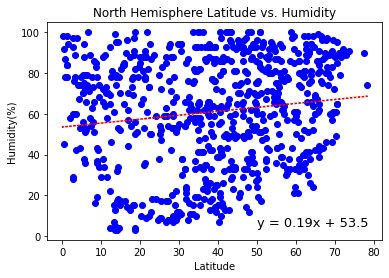

In [24]:
#North Hemisphere Humidity vs Latitude Linear Regression as nhhvllr

nhhvllr_correlation = sts.pearsonr(northhems['Latitude'],northhems['Humidity(%)'])
print(f'The correlation between both factors is {round(nhhvllr_correlation[0],2)}')

nhhvllr_slope, nhhvllr_int, nhhvllr_r, nhhvllr_p, nhhvllr_std_err = sts.linregress(northhems['Latitude'],northhems['Humidity(%)'])
nhhvllr_fit = nhhvllr_slope * northhems['Latitude'] + nhhvllr_int

plt.scatter(northhems['Latitude'],northhems['Humidity(%)'], color='blue', )
plt.title('North Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

line_equation = f'y = {str(round(nhhvllr_slope,2))}x + {str(round(nhhvllr_int,2))}'
plt.annotate(line_equation,(50,5),fontsize=13,color='black')
plt.plot(northhems['Latitude'],nhhvllr_fit,':r')
plt.savefig("output/northlat_vs_humi.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.11


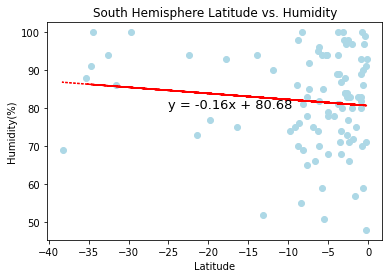

In [25]:
#South Hemisphere Humidity vs Latitude Linear Regression as shhvllr

shhvllr_correlation = sts.pearsonr(southhems['Latitude'],southhems['Humidity(%)'])
print(f'The correlation between both factors is {round(shhvllr_correlation[0],2)}')

shhvllr_slope, shhvllr_int, shhvllr_r, shhvllr_p, shhvllr_std_err = sts.linregress(southhems['Latitude'],southhems['Humidity(%)'])
shhvllr_fit = shhvllr_slope * southhems['Latitude'] + shhvllr_int

plt.scatter(southhems['Latitude'],southhems['Humidity(%)'], color='lightblue', )
plt.title('South Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

line_equation = f'y = {str(round(shhvllr_slope,2))}x + {str(round(shhvllr_int,2))}'
plt.annotate(line_equation,(-25,80),fontsize=13,color='black')
plt.plot(southhems['Latitude'],shhvllr_fit,':r')
plt.savefig("output/southlat_vs_humi.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.06


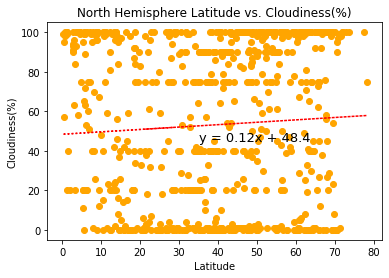

In [32]:
#North Hemisphere Cloudiness vs. Latitude Linear Regression as nhcvllr

nhcvllr_correlation = sts.pearsonr(northhems['Latitude'],northhems['Cloudiness(%)'])
print(f'The correlation between both factors is {round(nhcvllr_correlation[0],2)}')

nhcvllr_slope, nhcvllr_int, nhcvllr_r, nhcvllr_p, nhcvllr_std_err = sts.linregress(northhems['Latitude'],northhems['Cloudiness(%)'])
nhcvllr_fit = nhcvllr_slope * northhems['Latitude'] + nhcvllr_int

plt.scatter(northhems['Latitude'],northhems['Cloudiness(%)'], color='orange', )
plt.title('North Hemisphere Latitude vs. Cloudiness(%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

line_equation = f'y = {str(round(nhcvllr_slope,2))}x + {str(round(nhcvllr_int,2))}'
plt.annotate(line_equation,(35,45),fontsize=13,color='black')
plt.plot(northhems['Latitude'],nhcvllr_fit,':r')
plt.savefig("output/northlat_vs_cloudy.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.51


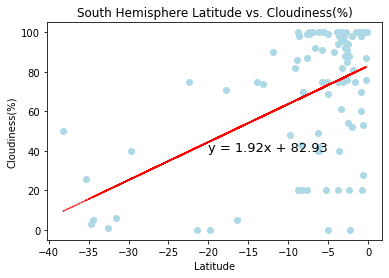

In [33]:
#South Hemisphere Cloudiness vs. Latitude Linear Regression as shcvllr

shcvllr_correlation = sts.pearsonr(southhems['Latitude'],southhems['Cloudiness(%)'])
print(f'The correlation between both factors is {round(shcvllr_correlation[0],2)}')

shcvllr_slope, shcvllr_int, shcvllr_r, shcvllr_p, shcvllr_std_err = sts.linregress(southhems['Latitude'],southhems['Cloudiness(%)'])
shcvllr_fit = shcvllr_slope * southhems['Latitude'] + shcvllr_int

plt.scatter(southhems['Latitude'],southhems['Cloudiness(%)'], color='lightblue', )
plt.title('South Hemisphere Latitude vs. Cloudiness(%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

line_equation = f'y = {str(round(shcvllr_slope,2))}x + {str(round(shcvllr_int,2))}'
plt.annotate(line_equation,(-20,40),fontsize=13,color='black')
plt.plot(southhems['Latitude'],shcvllr_fit,':r')
plt.savefig("output/southlat_vs_cloudy.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.12


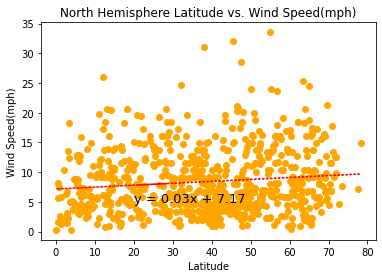

In [39]:
#North Hemisphere Wind Speed vs. Latitude Linear Regression as nhwvllr

nhwvllr_correlation = sts.pearsonr(northhems['Latitude'],northhems['Wind Speed(mph)'])
print(f'The correlation between both factors is {round(nhwvllr_correlation[0],2)}')

nhwvllr_slope, nhwvllr_int, nhwvllr_r, nhwvllr_p, nhwvllr_std_err = sts.linregress(northhems['Latitude'],northhems['Wind Speed(mph)'])
nhwvllr_fit = nhwvllr_slope * northhems['Latitude'] + nhwvllr_int

plt.scatter(northhems['Latitude'],northhems['Wind Speed(mph)'], color='orange', )
plt.title('North Hemisphere Latitude vs. Wind Speed(mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

line_equation = f'y = {str(round(nhwvllr_slope,2))}x + {str(round(nhwvllr_int,2))}'
plt.annotate(line_equation,(20,5),fontsize=13,color='black')
plt.plot(northhems['Latitude'],nhwvllr_fit,':r')
plt.savefig("output/northlat_vs_winds.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.0


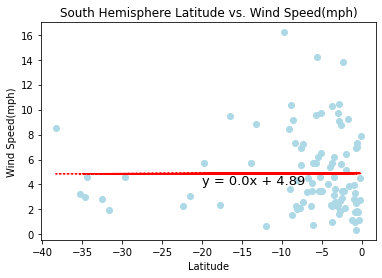

In [43]:
#South Hemisphere Cloudiness vs. Latitude Linear Regression as shwvllr

shwvllr_correlation = sts.pearsonr(southhems['Latitude'],southhems['Wind Speed(mph)'])
print(f'The correlation between both factors is {round(shwvllr_correlation[0],2)}')

shwvllr_slope, shwvllr_int, shwvllr_r, shwvllr_p, shwvllr_std_err = sts.linregress(southhems['Latitude'],southhems['Wind Speed(mph)'])
shwvllr_fit = shwvllr_slope * southhems['Latitude'] + shwvllr_int

plt.scatter(southhems['Latitude'],southhems['Wind Speed(mph)'], color='lightblue', )
plt.title('South Hemisphere Latitude vs. Wind Speed(mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

line_equation = f'y = {str(round(shwvllr_slope,2))}x + {str(round(shwvllr_int,2))}'
plt.annotate(line_equation,(-20,4),fontsize=13,color='black')
plt.plot(southhems['Latitude'],shwvllr_fit,':r')
plt.savefig("output/southlat_vs_winds.png")